<a href="https://colab.research.google.com/github/ss-shrishi2000/COVID-19-Analyzer/blob/main/Cov_19_Exploratory_Data_Analysis_And_Visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<font color="crimson">**SARS-CoV-2 VIRUS OR COVID-19 WORLDWIDE OUTBREAK**
### **The COVID-19 pandemic, also known as the coronavirus pandemic, is an ongoing global pandemic of coronavirus disease 2019 (COVID-19) caused by severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2).** The novel virus was first identified from an outbreak in Wuhan, China, in December 2019. Attempts to contain it there failed, allowing the virus to spread worldwide.**The World Health Organization (WHO) declared a Public Health Emergency of International Concern on 30 January 2020 and a pandemic on 11 March 2020**. As of 15 May 2022, the pandemic had caused more than 521 million cases and 6.26 million confirmed deaths, making it one of the deadliest in history.

###COVID-19 symptoms range from undetectable to deadly, but most commonly include **fever, dry cough, and fatigue. Severe illness is more likely in elderly patients and those with certain underlying medical conditions. COVID‑19 transmits when people breathe in air contaminated by droplets and small airborne particles containing the virus.** 
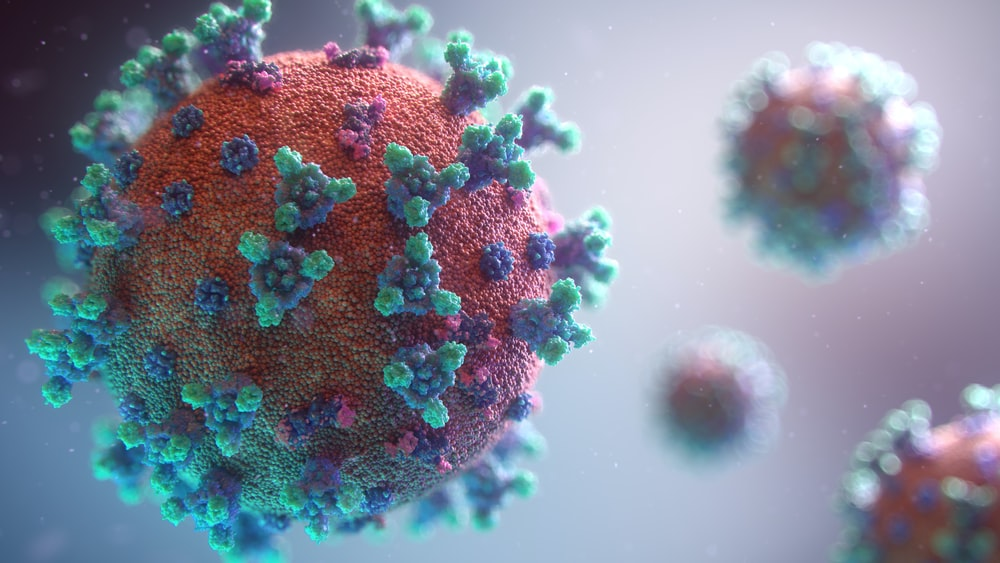


#**Importing Necessary Packages**



In [ ]:
!pip install folium
!pip install plotly

In [ ]:
import plotly
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

# for plotting multiple sub plots

import folium
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#essential packages
import math
import random
from datetime import timedelta
import warnings 
warnings.filterwarnings('ignore')
#timedelta is used to generate custom date and time as per the needs of the user
# making use of colour palletes for plotting maps in different colours hex-colour patterns 
cnf = '#393e46'
dth = '#ff2e63'
rec = '#21bf73'
act = '#01fecb'


#**Dataset Modelling And Preparation**

In [ ]:
#To run the Plotly offline
import plotly as py
import plotly.offline as pyo
pyo.init_notebook_mode()

In [ ]:
import os

In [ ]:
try: 
  os.system("rm -rf Covid-19-Preprocessed-Dataset")
except:
  print('File does not exists')

In [ ]:
!git clone https://github.com/laxmimerit/Covid-19-Preprocessed-Dataset.git

Cloning into 'Covid-19-Preprocessed-Dataset'...
remote: Enumerating objects: 2125, done.
remote: Counting objects: 100% (189/189), done.
remote: Compressing objects: 100% (80/80), done.
remote: Total 2125 (delta 110), reused 188 (delta 109), pack-reused 1936
Receiving objects: 100% (2125/2125), 222.06 MiB | 32.76 MiB/s, done.
Resolving deltas: 100% (804/804), done.
Checking out files: 100% (894/894), done.


In [ ]:
#reading cleaned version of the dataset
df = pd.read_csv('Covid-19-Preprocessed-Dataset/preprocessed/covid_19_data_cleaned.csv', parse_dates=['Date'])
# importing country-daywise, country-yearwise, countrywise and day-wise packages
country_daywise = pd.read_csv('Covid-19-Preprocessed-Dataset/preprocessed/covid_19_data_cleaned.csv', parse_dates=['Date'])
countrywise = pd.read_csv('Covid-19-Preprocessed-Dataset/preprocessed/countrywise.csv')
daywise = pd.read_csv('Covid-19-Preprocessed-Dataset/preprocessed/daywise.csv', parse_dates=['Date'])

In [ ]:
df

,Date,Province/State,Country,Lat,Long,Confirmed,Recovered,Deaths,Active
0,2020-01-22,NaN,Afghanistan,33.93911,67.709953,0,0,0,0
1,2020-01-23,NaN,Afghanistan,33.93911,67.709953,0,0,0,0
2,2020-01-24,NaN,Afghanistan,33.93911,67.709953,0,0,0,0
3,2020-01-25,NaN,Afghanistan,33.93911,67.709953,0,0,0,0
4,2020-01-26,NaN,Afghanistan,33.93911,67.709953,0,0,0,0
...,...,...,...,...,...,...,...,...,...
247927,2022-05-18,NaN,Timor-Leste,-8.87420,125.727500,0,0,0,0
247928,2022-05-19,NaN,Timor-Leste,-8.87420,125.727500,0,0,0,0
247929,2022-05-20,NaN,Timor-Leste,-8.87420,125.727500,0,0,0,0
247930,2022-05-21,NaN,Timor-Leste,-8.87420,125.727500,0,0,0,0


In [ ]:
#for handling the NaN values in the province/state column
# after doing so, we obtain the cleaned version of the data
df['Province/State'] = df['Province/State'].fillna("")
df

,Date,Province/State,Country,Lat,Long,Confirmed,Recovered,Deaths,Active
0,2020-01-22,,Afghanistan,33.93911,67.709953,0,0,0,0
1,2020-01-23,,Afghanistan,33.93911,67.709953,0,0,0,0
2,2020-01-24,,Afghanistan,33.93911,67.709953,0,0,0,0
3,2020-01-25,,Afghanistan,33.93911,67.709953,0,0,0,0
4,2020-01-26,,Afghanistan,33.93911,67.709953,0,0,0,0
...,...,...,...,...,...,...,...,...,...
247927,2022-05-18,,Timor-Leste,-8.87420,125.727500,0,0,0,0
247928,2022-05-19,,Timor-Leste,-8.87420,125.727500,0,0,0,0
247929,2022-05-20,,Timor-Leste,-8.87420,125.727500,0,0,0,0
247930,2022-05-21,,Timor-Leste,-8.87420,125.727500,0,0,0,0


In [ ]:
country_daywise

,Date,Province/State,Country,Lat,Long,Confirmed,Recovered,Deaths,Active
0,2020-01-22,NaN,Afghanistan,33.93911,67.709953,0,0,0,0
1,2020-01-23,NaN,Afghanistan,33.93911,67.709953,0,0,0,0
2,2020-01-24,NaN,Afghanistan,33.93911,67.709953,0,0,0,0
3,2020-01-25,NaN,Afghanistan,33.93911,67.709953,0,0,0,0
4,2020-01-26,NaN,Afghanistan,33.93911,67.709953,0,0,0,0
...,...,...,...,...,...,...,...,...,...
247927,2022-05-18,NaN,Timor-Leste,-8.87420,125.727500,0,0,0,0
247928,2022-05-19,NaN,Timor-Leste,-8.87420,125.727500,0,0,0,0
247929,2022-05-20,NaN,Timor-Leste,-8.87420,125.727500,0,0,0,0
247930,2022-05-21,NaN,Timor-Leste,-8.87420,125.727500,0,0,0,0


In [ ]:
# parsing the confirmed, recovered, active and deaths from the df or cleaned dataset
confirmed = df.groupby('Date').sum()['Confirmed'].reset_index()
confirmed

,Date,Confirmed
0,2020-01-22,557
1,2020-01-23,657
2,2020-01-24,944
3,2020-01-25,1437
4,2020-01-26,2120
...,...,...
847,2022-05-18,523453971
848,2022-05-19,524049571
849,2022-05-20,524896992
850,2022-05-21,525273264


In [ ]:
recovered = df.groupby('Date').sum()['Recovered'].reset_index()
recovered

,Date,Recovered
0,2020-01-22,30
1,2020-01-23,32
2,2020-01-24,39
3,2020-01-25,42
4,2020-01-26,56
...,...,...
847,2022-05-18,0
848,2022-05-19,0
849,2022-05-20,0
850,2022-05-21,0


In [ ]:
deaths = df.groupby('Date').sum()['Deaths'].reset_index()
deaths

,Date,Deaths
0,2020-01-22,17
1,2020-01-23,18
2,2020-01-24,26
3,2020-01-25,42
4,2020-01-26,56
...,...,...
847,2022-05-18,6271641
848,2022-05-19,6273518
849,2022-05-20,6275486
850,2022-05-21,6276601


In [ ]:
#if there is any presence of null values in our dataset
df.isnull().sum()
#we come across the conclusion that there are no null values present in our dataset

Date              0
Province/State    0
Country           0
Lat               0
Long              0
Confirmed         0
Recovered         0
Deaths            0
Active            0
dtype: int64

In [ ]:
df.info()
# Observation :-
# Date Column - Parsed as datetime
# Two columns named as Dtype => object (strings)
# Latitude and Longitude being the Floating Point values in the dataframe
# Confirmed, Recovered, Deaths, Active Cases in Integer Format

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247932 entries, 0 to 247931
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Date            247932 non-null  datetime64[ns]
 1   Province/State  247932 non-null  object        
 2   Country         247932 non-null  object        
 3   Lat             247932 non-null  float64       
 4   Long            247932 non-null  float64       
 5   Confirmed       247932 non-null  int64         
 6   Recovered       247932 non-null  int64         
 7   Deaths          247932 non-null  int64         
 8   Active          247932 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(2)
memory usage: 17.0+ MB


In [ ]:
df.query('Country == "US" ')

,Date,Province/State,Country,Lat,Long,Confirmed,Recovered,Deaths,Active
218964,2020-01-22,,US,40.0,-100.0,1,0,0,1
218965,2020-01-23,,US,40.0,-100.0,1,0,0,1
218966,2020-01-24,,US,40.0,-100.0,2,0,0,2
218967,2020-01-25,,US,40.0,-100.0,2,0,0,2
218968,2020-01-26,,US,40.0,-100.0,5,0,0,5
...,...,...,...,...,...,...,...,...,...
219811,2022-05-18,,US,40.0,-100.0,82951379,0,1001269,81950110
219812,2022-05-19,,US,40.0,-100.0,83060959,0,1001606,82059353
219813,2022-05-20,,US,40.0,-100.0,83237592,0,1002020,82235572
219814,2022-05-21,,US,40.0,-100.0,83263020,0,1002146,82260874


#<font color="blue">**WorldWide Total Confirmed, Recovered, and Death Cases Analysis**

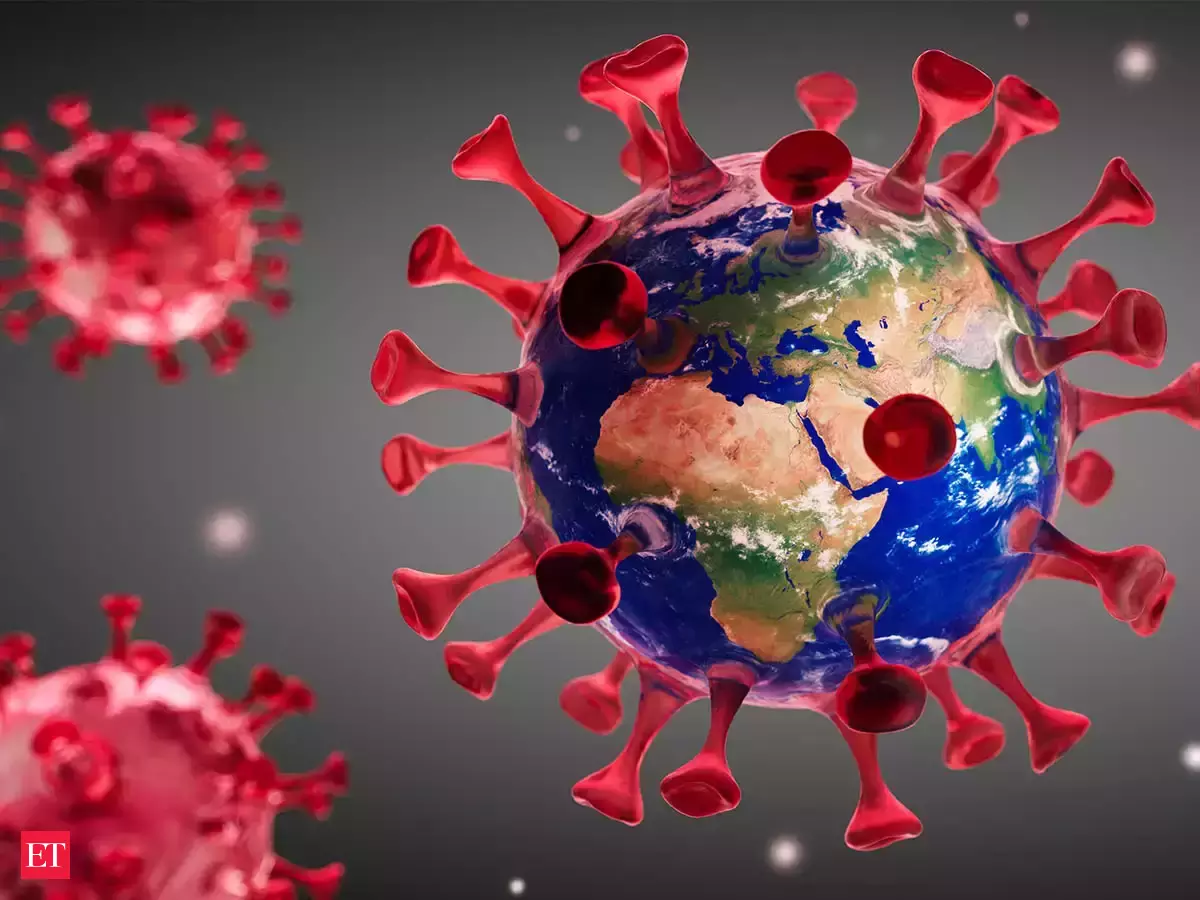

In [ ]:
# the earliest confirmed cases
confirmed.head()

,Date,Confirmed
0,2020-01-22,557
1,2020-01-23,657
2,2020-01-24,944
3,2020-01-25,1437
4,2020-01-26,2120


In [ ]:
# the latest confirmed cases
confirmed.tail()

,Date,Confirmed
847,2022-05-18,523453971
848,2022-05-19,524049571
849,2022-05-20,524896992
850,2022-05-21,525273264
851,2022-05-22,525610297


In [ ]:
recovered.tail()

,Date,Recovered
847,2022-05-18,0
848,2022-05-19,0
849,2022-05-20,0
850,2022-05-21,0
851,2022-05-22,0


In [ ]:
# the last five rows of the Deaths encountered
deaths.tail()

,Date,Deaths
847,2022-05-18,6271641
848,2022-05-19,6273518
849,2022-05-20,6275486
850,2022-05-21,6276601
851,2022-05-22,6277233


#<font color="green">**Plotting the Latest Confirmed, Recovery, And Deaths From Dataset Using ScatterPlot**

In [ ]:
import plotly
plotly.io.renderers.default = 'colab'
fig = go.Figure()
fig.add_trace(go.Scatter(x = confirmed['Date'], y = confirmed['Confirmed'], mode = 'markers', name = 'Confirmed', line = dict(color = "Orange")))

fig.add_trace(go.Scatter(x = confirmed['Date'], y = recovered['Recovered'], mode = 'markers', name = 'Recovered', line = dict(color = "Blue")))

fig.add_trace(go.Scatter(x = confirmed['Date'], y = deaths['Deaths'], mode = 'markers', name = 'Deaths', line = dict(color = "Red")))
fig.update_layout(title_text='WorldWide Confirmed, Recovered, Death Cases Representation',plot_bgcolor='rgb(230, 230, 230)')
fig.show()

#<font color="blue">**Cases Density Animation On World Maps**

In [ ]:
df['Date'] = df['Date'].astype(str)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247932 entries, 0 to 247931
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Date            247932 non-null  object 
 1   Province/State  247932 non-null  object 
 2   Country         247932 non-null  object 
 3   Lat             247932 non-null  float64
 4   Long            247932 non-null  float64
 5   Confirmed       247932 non-null  int64  
 6   Recovered       247932 non-null  int64  
 7   Deaths          247932 non-null  int64  
 8   Active          247932 non-null  int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 17.0+ MB


In [ ]:
df.head()

,Date,Province/State,Country,Lat,Long,Confirmed,Recovered,Deaths,Active
0,2020-01-22,,Afghanistan,33.93911,67.709953,0,0,0,0
1,2020-01-23,,Afghanistan,33.93911,67.709953,0,0,0,0
2,2020-01-24,,Afghanistan,33.93911,67.709953,0,0,0,0
3,2020-01-25,,Afghanistan,33.93911,67.709953,0,0,0,0
4,2020-01-26,,Afghanistan,33.93911,67.709953,0,0,0,0


In [ ]:
fig = px.density_mapbox(df, lat = 'Lat', lon = 'Long', hover_name = 'Country', hover_data = ['Confirmed', 'Recovered', 'Deaths'], animation_frame='Date', 
                        color_continuous_scale='Portland', radius=7, zoom = 0, height = 700)
fig.update_layout(title = 'Worldwide Covid-19 Cases With Time Lapse')
fig.update_layout(mapbox_style = 'open-street-map', mapbox_center_lon = 0)
fig.show()

# This produces a map and an animation where we shall be watching our data's interactivity
#Add the map information with fig.update()
# A beautiful interactive world map with COVID-19 Cases is depicted on the screen.
# When we run the animation, it runs the timer alongwith the dates from 22/01/2020 till 26/04/2022
# By hovering over the Particular State/Province, we can see the updated/ growing / reducing count of the COVID-19 Confirmed, Recovered, Death Cases.


In [ ]:
temp = df.groupby('Date')['Recovered', 'Deaths', 'Active'].sum().reset_index()
temp

,Date,Recovered,Deaths,Active
0,2020-01-22,30,17,510
1,2020-01-23,32,18,607
2,2020-01-24,39,26,879
3,2020-01-25,42,42,1353
4,2020-01-26,56,56,2008
...,...,...,...,...
847,2022-05-18,0,6271641,517182330
848,2022-05-19,0,6273518,517776053
849,2022-05-20,0,6275486,518621506
850,2022-05-21,0,6276601,518996663


In [ ]:
temp = df.groupby('Date')['Recovered', 'Deaths', 'Active'].sum().reset_index()
temp = temp.melt(id_vars = 'Date', value_vars = ['Recovered', 'Deaths', 'Active'], var_name = 'Case', value_name = 'Count')
fig = px.area(temp, x = 'Date', y = 'Count', color = 'Case', height = 800, title = 'Cases Over Time Plot', color_discrete_sequence=[cnf, dth, act])
fig.update_layout(xaxis_rangeslider_visible=True)
fig.show()

#<font color="brown">**Confirmed Cases Depiction Using Chloropleth Maps =>**
* A choropleth map is a type of statistical thematic map that uses intensity of color to correspond with an aggregate summary of a geographic characteristic within spatial enumeration units, such as population density or per-capita income.
* Choropleth maps provide an easy way to visualize how a variable varies 

*  Choropleth maps provide an easy way to visualize how a variable varies 
across a geographic area or show the level of variability within a region.
 A heat map or isarithmic map is similar but uses regions drawn according to 

*   A heat map or is an arithmic map is similar but uses regions drawn according to the pattern of the variable, rather than the a priori geographic areas of choropleth maps. 
* The Choropleth is likely the most common type of thematic map because published statistical data (from government or other sources) is generally aggregated into well-known geographic units, such as countries, states, provinces, and counties, and thus they are relatively easy to create using GIS, spreadsheets, or other software tools.



In [ ]:
#The places where the cases are less the zones shall be lightly coloured whereas the ones where the cases are fairly high shall be appearing dense
# Country Daywise cases are plotted

fig = px.choropleth(country_daywise, locations= 'Country', locationmode='country names', color = (country_daywise['Confirmed']),
                    hover_name = 'Country', animation_frame=country_daywise['Date'].dt.strftime('%Y.%m.%d'), title='Cases Over Time', color_continuous_scale = px.colors.sequential.Inferno)

fig.update(layout_coloraxis_showscale = True)
fig.show()
#larger the size of the confirmed cases, more brighter is the representation
#we can hover around and check the countries changing number of cases


#<font color="blue">**15 Countries Covid-19 Data Trend Analysis**

###Here, we are going to plot the various visualisations using the country-wise available data and we can clearly see the results on the basis of the visualisations.

In [ ]:
countrywise.columns

Index(['Country', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'New Cases',
       'Deaths / 100 Cases', 'Recovered / 100 Cases', 'Deaths / 100 Recovered',
       'Population', 'Cases / Million People', 'Confirmed last week',
       '1 week change', '1 week % increase'],
      dtype='object')

In [ ]:
top = 15

fig_c = px.bar(countrywise.sort_values('Confirmed').tail(top), x='Confirmed', y='Country', text = 'Confirmed', orientation='h', color_discrete_sequence = [cnf])
fig_d = px.bar(countrywise.sort_values('Deaths').tail(top), x='Deaths', y='Country', text = 'Deaths', orientation='h', color_discrete_sequence = [dth])

fig_r = px.bar(countrywise.sort_values('Recovered').tail(top), x='Recovered', y='Country', text = 'Recovered', orientation='h', color_discrete_sequence = [rec])
fig_a = px.bar(countrywise.sort_values('Active').tail(top), x='Active', y='Country', text = 'Active', orientation='h', color_discrete_sequence = [act])

fig_dc = px.bar(countrywise.sort_values('Deaths / 100 Cases').tail(top), x='Deaths / 100 Cases', y='Country', text = 'Deaths / 100 Cases', orientation='h', color_discrete_sequence = [cnf])
fig_rc = px.bar(countrywise.sort_values('Recovered / 100 Cases').tail(top), x='Recovered / 100 Cases', y='Country', text = 'Recovered / 100 Cases', orientation='h', color_discrete_sequence = [cnf])


fig_ncs = px.bar(countrywise.sort_values('New Cases').tail(top), x='New Cases', y='Country', text = 'New Cases', orientation='h', color_discrete_sequence = ['#f04651'])
fig_cspm = px.bar(countrywise.sort_values('Cases / Million People').tail(top), x='Cases / Million People', y='Country', text = 'Cases / Million People', orientation='h', color_discrete_sequence = ['#f45912'])

fig_week = px.bar(countrywise.sort_values('1 week change').tail(top), x='1 week change', y='Country', text = '1 week change', orientation='h', color_discrete_sequence = ['#f08881'])
fig_week_change = px.bar(countrywise.sort_values('1 week % increase').tail(top), x='1 week % increase', y='Country', text = '1 week % increase', orientation='h', color_discrete_sequence = ['#f43679'])

fig = make_subplots(rows = 5, cols = 2, shared_xaxes = False, horizontal_spacing = 0.2, vertical_spacing =.05, subplot_titles=('Confirmed Cases', 'Deaths Reported', 'Active Cases', 'Deaths / 100 Cases', 
                                                                                                                               'New Cases', 'Cases/Million People', '1 Week Change', '1 Week % Increment'))

fig.add_trace(fig_c['data'][0], row = 1, col = 1)
fig.add_trace(fig_d['data'][0], row = 1, col = 2)


#fig.add_trace(fig_r['data'][0], row = 2, col = 1)
fig.add_trace(fig_a['data'][0], row = 2, col = 1)
fig.add_trace(fig_dc['data'][0], row = 2, col = 2)
#fig.add_trace(fig_rc['data'][0], row = 3, col = 1)
fig.add_trace(fig_ncs['data'][0], row = 3, col = 1)
fig.add_trace(fig_cspm['data'][0], row = 3, col = 2)
fig.add_trace(fig_week['data'][0], row = 4, col = 1)
fig.add_trace(fig_week_change['data'][0], row = 4, col = 2)

fig.update_layout(height = 4000)
fig.show()



#<font color="blue">**TreeMap Analysis**

##**What is a Treemap?**       <br>
###A treemap is a special type of chart for visualization using a set of nested rectangles of categorical data that is preferably hierarchical. Treemaps were first used in the 1990s by Professor Ben Shneiderman at the University of Maryland.

###In Hierarchical data, the categories or items share parent-child type relationships in an overall tree structure. The simplest example of this type of data structure can be seen in a company where all individuals and their designations within teams could be grouped under one entity i.e., the company itself. However, sometimes, treemaps can also be used with non-hierarchical data.

#**Benefits of using a Treemap**

###Treemaps offer some interesting advantages over the regular pie charts and bar charts in certain situations like –

– **Space constraint**: There is a large amount of hierarchical data that needs to be visualized in a smaller space.

– **Easier to read**: When compared to a circular multi-level pie chart, the treemap is easier to read due to its linear visual appearance.

– **Quickly spot patterns**: Since each group is represented by a rectangle and the area of this rectangle is always proportional to its value, trends and patterns (similarities and anomalies) are quickly visible in treemaps.

In [ ]:
full_latest = df[df['Date'] == max(df['Date'])]

fig = px.treemap(full_latest.sort_values(by = 'Confirmed', ascending = False).reset_index(drop = True),
                 path = ['Country', 'Province/State'], values = 'Confirmed', height = 700,
                 color_discrete_sequence = px.colors.qualitative.Dark2)
fig.data[0].textinfo = 'label+text+value'
fig.show()

In [ ]:
full_latest = df[df['Date'] == max(df['Date'])]

fig = px.treemap(full_latest.sort_values(by = 'Deaths', ascending = False).reset_index(drop = True),
                 path = ['Country', 'Province/State'], values = 'Deaths', height = 700,
                 color_discrete_sequence = px.colors.qualitative.Dark2)
fig.data[0].textinfo = 'label+text+value'
fig.show()

In [ ]:
full_latest = df[df['Date'] == max(df['Date'])]

fig = px.treemap(full_latest.sort_values(by = 'Active', ascending = False).reset_index(drop = True),
                 path = ['Country', 'Province/State'], values = 'Active', height = 700,
                 color_discrete_sequence = px.colors.qualitative.Dark2)
fig.data[0].textinfo = 'label+text+value'
fig.show()

#<font color="orange">**COVID-19 v/s Other Similar Epidemics**

###In this section, we intend to perform the Exploratory Data Analysis upon the Previously Occured **Pandemics/ Epidemics**.
<br> 
##**Source Of Information Used => Wikipedia**

In [ ]:

epidemics = pd.DataFrame({
    'epidemic' : ['COVID-19', 'SARS', 'EBOLA', 'MERS', 'H1N1'],
    'start_year' : [2019, 2002, 2013, 2012, 2009],
    'end_year': [2021, 2004, 2016, 2020, 2010],
    'confirmed': [full_latest['Confirmed'].sum(), 8422, 28646, 2519, 6724149],
    'deaths' : [full_latest['Deaths'].sum(), 813, 11323, 866, 19654]
})

#creation of variables for checking the mortality rate

epidemics['mortality'] = round((epidemics['deaths']/epidemics['confirmed'])*100, 2)

epidemics.head()

,epidemic,start_year,end_year,confirmed,deaths,mortality
0,COVID-19,2019,2021,525610297,6277233,1.19
1,SARS,2002,2004,8422,813,9.65
2,EBOLA,2013,2016,28646,11323,39.53
3,MERS,2012,2020,2519,866,34.38
4,H1N1,2009,2010,6724149,19654,0.29


In [ ]:
#performing melt rate

temp = epidemics.melt(id_vars='epidemic', value_vars=['confirmed', 'deaths', 'mortality'],
                      var_name='Case', value_name='Value')

temp

fig = px.bar(temp, x = 'epidemic', y = 'Value', color = 'epidemic', text = 'Value', facet_col = 'Case', 
                 color_discrete_sequence=px.colors.qualitative.Bold)
fig.update_traces(textposition='outside')
fig.update_layout(uniformtext_minsize = 8, uniformtext_mode = 'hide')
fig.update_yaxes(showticklabels = False)
fig.layout.yaxis2.update(matches = None)
fig.layout.yaxis3.update(matches = None)
fig.show()